In [1]:
# Generic ones
import numpy as np
import pandas as pd
import os

# Word processing libraries
import re
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import glob
import gzip

# dfs=[]
data = None
total_count=0
keywords_str='chopstickflu|chopstickvirus|kungfuvirus|kungflu'
print('filtering by:', keywords_str)

months=['02','03','04','05']
for mon in months:
    path="E:\\Projects\\twitter_covid\\2020-"+ mon +"\\*.gz"
    print('path: ', path)
    for file in glob.glob(path):
        print(file)
        df = pd.read_json(path_or_buf=file, lines=True, compression='infer')

        total_count+=df.shape[0]
        df = df[df['full_text'].str.contains("(?i)"+keywords_str)]
        df.reset_index(inplace = True, drop = True)
        if data is None:
            data = df
        else:
            data = pd.concat([data, df], axis = 0)
            # Reset_index
            data.reset_index(inplace = True, drop = True)
        
data_orig=data.copy()

print('Size of dataset before filtering:', total_count)
print('Size of dataset after filtering:', data.shape[0])

filtering by: chopstickflu|chopstickvirus|kungfuvirus|kungflu
path:  E:\Projects\twitter_covid\2020-02\*.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-01-14.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-01.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-04.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-08.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-12.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-14.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-02-19.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-03-07.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-03-11.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-04-04.jsonl.gz
E:\Projects\twitter_covid\2020-02\coronavirus-tweet-id-2020-02-04-06.jsonl.gz
E:\Projects\twitter_covid\2020-02\

E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-18-20.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-18-23.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-20-00.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-20-18.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-21-22.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-22-04.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-22-14.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-23-15.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-24-18.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-25-10.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-25-19.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-26-12.jsonl.gz
E:\Projects\twitter_covid\2020-03\coronavirus-tweet-id-2020-03-2

E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-09-15.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-09-20.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-11-03.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-11-05.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-11-22.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-12-05.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-13-05.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-13-19.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-14-00.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-14-03.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-15-17.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-15-19.jsonl.gz
E:\Projects\twitter_covid\2020-05\coronavirus-tweet-id-2020-05-1

In [3]:
data['hashtags'] = data['entities'].apply(lambda x: x['hashtags'])
data['hashtags'].head(2)

0                                                   []
1    [{'text': '2019CoV', 'indices': [105, 113]}, {...
Name: hashtags, dtype: object

In [4]:
# Remove empty tweets
data.dropna(subset = ['full_text'], inplace = True)
# The unicode accounts for Chinese characters and punctuations.
def strip_chinese_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string
# Apply strip_chinese_words(...) on the column 'text'
data['full_text'] = data['full_text'].apply(lambda x: strip_chinese_words(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags
0,2020-02-01 14:19:53+00:00,1223611934286733312,1223611934286733312,RT @OpalWhiteley: @505nalfred @Charitable_Fury...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,False,False,NaN,en,NaN,{'created_at': 'Thu Jan 30 06:08:08 +0000 2020...,NaN,NaN,NaN,[]
1,2020-02-01 14:21:33+00:00,1223612352232349698,1223612352232349696,‘Burning Bodies In Secret’ – New Accounts From...,False,"[0, 135]","{'hashtags': [{'text': '2019CoV', 'indices': [...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': '2019CoV', 'indices': [105, 113]}, {..."
2,2020-02-02 01:04:09+00:00,1223774068861743104,1223774068861743104,UMass Boston student first confirmed case of c...,False,"[0, 128]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [98, 110]}..."
3,2020-02-02 01:13:22+00:00,1223776388936802306,1223776388936802304,China death toll reaches 259; WHO warns countr...,False,"[0, 115]","{'hashtags': [{'text': '2020CoV', 'indices': [...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': '2020CoV', 'indices': [85, 93]}, {'t..."
4,2020-02-02 01:21:24+00:00,1223778412894003200,1223778412894003200,"Can we call the epidemic in Wuhan, the Kung Fl...",False,"[0, 133]",{'hashtags': [{'text': 'everybodywaskungflufig...,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'everybodywaskungflufighting', 'indi..."


In [5]:
# Define function to sieve out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\s]+', string)
    return usernames
# Create a new column and apply the function on the column 'text'
data['mentioned_users'] = data['full_text'].apply(lambda x: mentioned_users(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags,mentioned_users
0,2020-02-01 14:19:53+00:00,1223611934286733312,1223611934286733312,RT @OpalWhiteley: @505nalfred @Charitable_Fury...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,False,NaN,en,NaN,{'created_at': 'Thu Jan 30 06:08:08 +0000 2020...,NaN,NaN,NaN,[],"[@OpalWhiteley:, @505nalfred, @Charitable_Fury..."
1,2020-02-01 14:21:33+00:00,1223612352232349698,1223612352232349696,‘Burning Bodies In Secret’ – New Accounts From...,False,"[0, 135]","{'hashtags': [{'text': '2019CoV', 'indices': [...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': '2019CoV', 'indices': [105, 113]}, {...",[]
2,2020-02-02 01:04:09+00:00,1223774068861743104,1223774068861743104,UMass Boston student first confirmed case of c...,False,"[0, 128]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [98, 110]}...",[]
3,2020-02-02 01:13:22+00:00,1223776388936802306,1223776388936802304,China death toll reaches 259; WHO warns countr...,False,"[0, 115]","{'hashtags': [{'text': '2020CoV', 'indices': [...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': '2020CoV', 'indices': [85, 93]}, {'t...",[]
4,2020-02-02 01:21:24+00:00,1223778412894003200,1223778412894003200,"Can we call the epidemic in Wuhan, the Kung Fl...",False,"[0, 133]",{'hashtags': [{'text': 'everybodywaskungflufig...,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,...,False,NaN,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'everybodywaskungflufighting', 'indi...",[]


In [6]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
# Define the function to implement POS tagging:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Define the main function to clean text in various ways:
def clean_text(text):
    
    # Apply regex expressions first before converting string to list of tokens/words:
    # 1. remove @usernames
    text = re.sub('@[^\s]+', '', text)
    
    # 2. remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    
    # 3. remove hashtags entirely i.e. #hashtags
    text = re.sub(r'#([^\s]+)', '', text)
    
    # 4. remove emojis
    text = emoji_pattern.sub(r'', text)
    
    # 5. Convert text to lowercase
    text = text.lower()
    
    # 6. tokenise text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # 7. remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # 8. remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # 9. remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # 10. pos tag text and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # 11. remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)
# Apply function on the column 'text':
data['cleaned_text'] = data['full_text'].apply(lambda x: clean_text(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,possibly_sensitive,lang,extended_entities,retweeted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags,mentioned_users,cleaned_text
0,2020-02-01 14:19:53+00:00,1223611934286733312,1223611934286733312,RT @OpalWhiteley: @505nalfred @Charitable_Fury...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,en,NaN,{'created_at': 'Thu Jan 30 06:08:08 +0000 2020...,NaN,NaN,NaN,[],"[@OpalWhiteley:, @505nalfred, @Charitable_Fury...",rt dave explain best.\nthe globalist banker us...
1,2020-02-01 14:21:33+00:00,1223612352232349698,1223612352232349696,‘Burning Bodies In Secret’ – New Accounts From...,False,"[0, 135]","{'hashtags': [{'text': '2019CoV', 'indices': [...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': '2019CoV', 'indices': [105, 113]}, {...",[],‘burning body secret’ new account wuhan detail...
2,2020-02-02 01:04:09+00:00,1223774068861743104,1223774068861743104,UMass Boston student first confirmed case of c...,False,"[0, 128]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [98, 110]}...",[],umass boston student first confirm case corona...
3,2020-02-02 01:13:22+00:00,1223776388936802306,1223776388936802304,China death toll reaches 259; WHO warns countr...,False,"[0, 115]","{'hashtags': [{'text': '2020CoV', 'indices': [...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,0.0,en,NaN,NaN,NaN,NaN,NaN,"[{'text': '2020CoV', 'indices': [85, 93]}, {'t...",[],china death toll reach warns country prepare
4,2020-02-02 01:21:24+00:00,1223778412894003200,1223778412894003200,"Can we call the epidemic in Wuhan, the Kung Fl...",False,"[0, 133]",{'hashtags': [{'text': 'everybodywaskungflufig...,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,...,NaN,en,NaN,NaN,NaN,NaN,NaN,"[{'text': 'everybodywaskungflufighting', 'indi...",[],call epidemic wuhan kung flu say cdc kung flu ...


In [7]:
# Define a function to perform this extraction:
def extract_hashtags(hashtag_list):
    # argument:
    # hashtag_list - a list of dictionary(ies), each containing a hashtag
    
    # Create a list to store the hashtags
    hashtags = []
    if isinstance(hashtag_list, float):
        hashtag_list=[]
    
    # Loop through the list:
    for i in range(0, len(hashtag_list)):
        # extract the hashtag value using the key - 'text'
        # For our purposes, we can ignore the indices, which tell us the position of the hashtags in the string of tweet
        # lowercase the text as well
        hashtags.append(hashtag_list[i]['text'].lower())
        
    return hashtags
# Apply function on the column - data['hashtags']
data['hashtags'] = data['hashtags'].apply(lambda x: extract_hashtags(x))
# Check out the updated column 'hashtags'
print(data.head()['hashtags'])

0                                        []
1           [2019cov, kungflu, coronavirus]
2           [coronavirus, kungflu, 2019cov]
3           [2020cov, kungflu, coronavirus]
4    [everybodywaskungflufighting, kungflu]
Name: hashtags, dtype: object


In [8]:
#Show hashtags
        
data[data['hashtags'].apply(lambda x: True if len(x)>0 else False)]['hashtags']

1                        [2019cov, kungflu, coronavirus]
2                        [coronavirus, kungflu, 2019cov]
3                        [2020cov, kungflu, coronavirus]
4                 [everybodywaskungflufighting, kungflu]
5                                 [coronavirus, kungflu]
                             ...                        
563    [kungflu, wuhanvirus, chinavirus, chinaliedpeo...
564                           [maga, kungflu, wuflu, fu]
566    [wuhanvirus, kungflu, wuhanreddeath, wuhanflu,...
567                      [kungflu, plandemic, obamagate]
569                                            [kungflu]
Name: hashtags, Length: 323, dtype: object

In [9]:
data['location'] = df.user.apply(lambda x: x['location'])
data['acctdesc'] = df.user.apply(lambda x: x['description'])
data[['location','acctdesc']].head(3)

,location,acctdesc
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN


In [10]:
# Replace NaN (empty) values with n.a to indicate that the user did not state his location
# Define a function to handle this:
def remove_nan(text):
    if pd.isnull(text) == True: # entry is NaN
        text = 'n.a'
    else:
        # lowercase text for possible easy handling
        text = text.lower()
        
    return text
# Apply function on column - data['location']
data['location'] = data['location'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['location'])
# Let's take a quick look at the value_counts()
data['location'].value_counts()

0    n.a
1    n.a
2    n.a
3    n.a
4    n.a
Name: location, dtype: object


n.a    570
Name: location, dtype: int64

In [11]:
# Apply the function already defined above: remove_nan(...)
# Apply function on column - data['acctdesc']
data['acctdesc'] = data['acctdesc'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['acctdesc'])

0    n.a
1    n.a
2    n.a
3    n.a
4    n.a
Name: acctdesc, dtype: object


In [ ]:
# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()
# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data['cleaned_text'].apply(lambda x: sid.polarity_scores(x))
# Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1)

In [ ]:
# New column: number of characters in 'review'
data['numchars'] = data['cleaned_text'].apply(lambda x: len(x))
# New column: number of words in 'review'
data['numwords'] = data['cleaned_text'].apply(lambda x: len(x.split(" ")))
# Check the new columns:
data.tail(2)

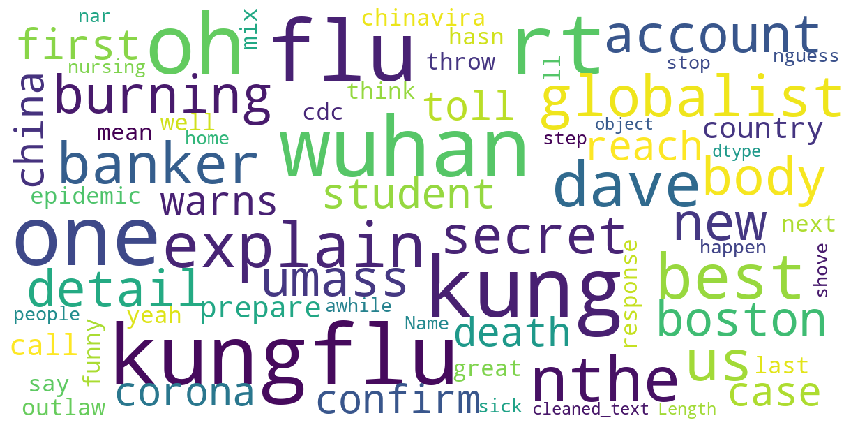

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data['cleaned_text'])

In [13]:
# the column data['hashtags'] returns a list of string(s) for each tweet. Build a list of all hashtags in the dataset.
hashtag_list = []
for i in range(0, len(data)):
    # Obtain the current list of hashtags
    curr_hashtag = data.iloc[i, :]['hashtags']
    
    # Extract and append the hashtags to 'hashtag_list':
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
        
# No. of hashtags
print('No. of hashtags used in {} tweets is {}'.format(len(data), len(hashtag_list)))

df_hashtag = pd.DataFrame(
    {'hashtags': hashtag_list}
)
print(df_hashtag.head(20))
print('Shape of df_hashtag is:', df_hashtag.shape)

No. of hashtags used in 570 tweets is 1069
                       hashtags
0                       2019cov
1                       kungflu
2                   coronavirus
3                   coronavirus
4                       kungflu
5                       2019cov
6                       2020cov
7                       kungflu
8                   coronavirus
9   everybodywaskungflufighting
10                      kungflu
11                  coronavirus
12                      kungflu
13                  coronavirus
14                      kungflu
15                     2019ncov
16                  coronavirus
17                      kungflu
18                  coronavirus
19                      kungflu
Shape of df_hashtag is: (1069, 1)


                   hashtags  counts
155                 kungflu     305
70              coronavirus      62
48             chinesevirus      39
86                  covid19      38
41               chinavirus      26
286              wuhanvirus      23
91                covid2019      20
78         coronavirustruth      19
67     coronarvirusoutbreak      19
69             coronavirius      19
81         coronaviruswuhan      19
36      chinaliedpeopledied      16
30                    china      16
275                   wuflu      11
276                   wuhan      10
157         kungflufighting       9
2                  2019ncov       8
169                    maga       7
76      coronavirusoutbreak       7
160             kungfuvirus       7
79        coronavirusupdate       6
45       chinesecoronavirus       5
186               obamagate       5
277        wuhancoronavirus       5
92                 covid_19       5
32         chinacoronavirus       5
253           trumppandemic 

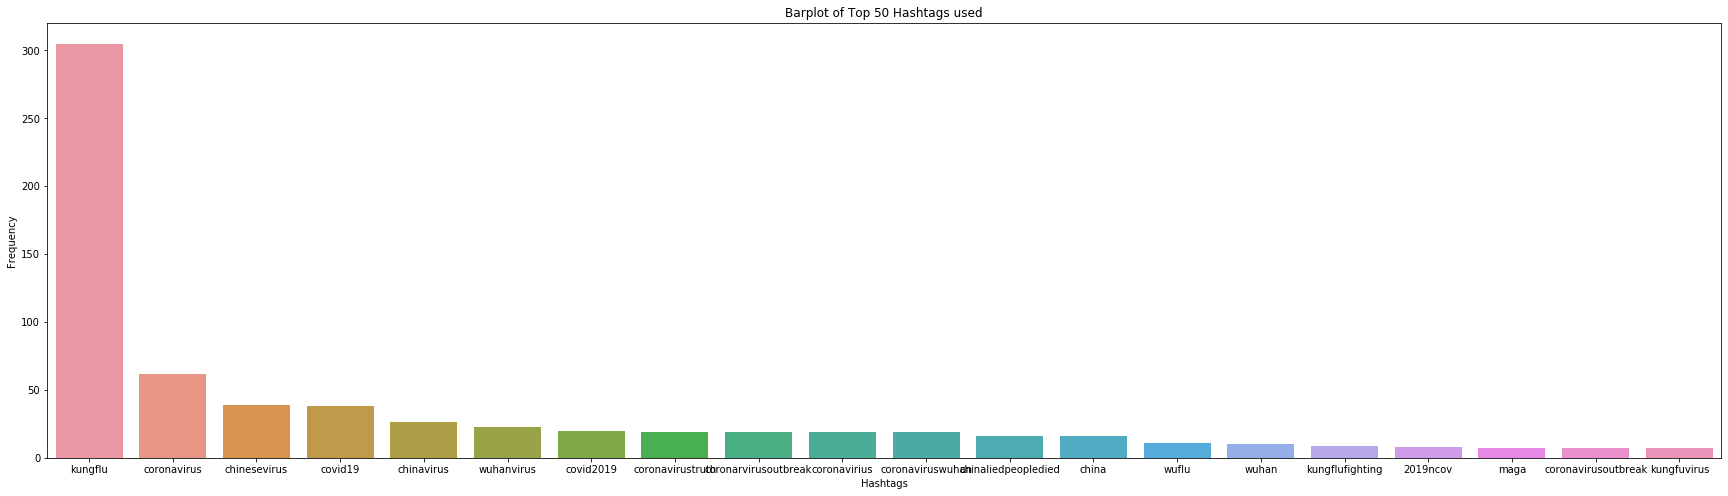

In [30]:
import seaborn as sns

# Define N to be the top number of hashtags
N1 = 50
N2 = 20
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False).head(N1)
print(top_hashtags)
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False).head(N2)
# seaborn countplot on the top N hashtags
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags)
plt.title('Barplot of Top ' + str(N) + ' Hashtags used')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

In [15]:
def get_full_name(x):
    if x is None:
        return None
    else:
        return x['full_name']
data['place_full_name']=data['place'].apply(lambda x: get_full_name(x))

data[data['place_full_name'].apply(lambda x: x is not None)]['place_full_name']

data[data['coordinates'].apply(lambda x: x is not None)]


261         Memphis, TN
285    Toronto, Ontario
300     Los Angeles, CA
304    Indianapolis, IN
450      Middletown, NY
Name: place_full_name, dtype: object

In [29]:
data[['id_str','full_text','hashtags','created_at']].to_csv('E:\\Projects\\twitter_covid\\full_kungflu.csv', index=False)

In [21]:
np.savetxt(r'E:\\Projects\\twitter_covid\\fungflu.txt', data['id_str'].values, fmt='%d')